# 5 Neural Networks

## 5.1.  Feed-forward Network Functions

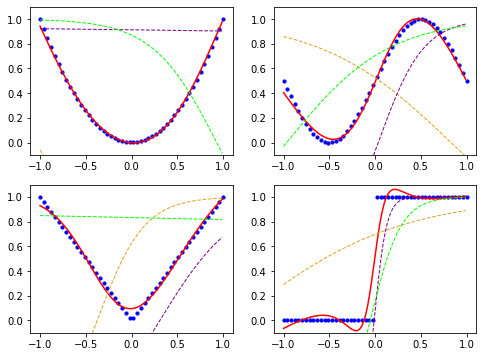

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nn.linear_nn import Linear_NeuralNet
%matplotlib inline

N = 50 # The number of test data

def multi_func(x,f_name='square'):
    if f_name == 'square':
        f = x**2
    elif f_name == 'heaviside':
        f = 0.5 * (np.sign(x) + 1)
    elif f_name == 'sinusoidal':
        f = 0.5 + 0.5 * np.sin(x * np.pi)
    elif f_name == 'absolute':
        f = np.abs(x)
    return f


# training data
train_x = np.linspace(-1, 1, N).reshape(N, 1)

# test data
test_x = np.arange(-1,1,0.01)

fig = plt.figure(figsize=(8, 6))
color_list = ['goldenrod','purple','lime']

for n,f_name in enumerate(['square','sinusoidal','absolute','heaviside'],1):
    train_y = multi_func(train_x,f_name)
    # Construncting NeuralNet
    model = Linear_NeuralNet(1,3,1)
    model.fit(train_x,train_y)
    y = model(test_x)
    # Plotting training data
    ax = fig.add_subplot(2,2,n)
    ax.scatter(train_x, train_y,s=10,color='blue')
    ax.plot(test_x, y, 'r-')
    plt.ylim([-0.1, 1.1])
    # Plotting the output of hidden layer
    test_z = model.get_hidden_output(test_x)
    for i in range(np.size(test_z,1)):
        ax.plot(test_x, test_z[:,i],color=color_list[i],linestyle='dashed',linewidth=1)
plt.show()

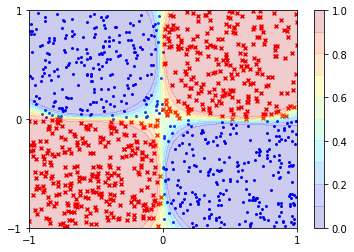

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from nn.classifier_nn import Classifier_NeuralNet

def create_noise_data(sample:int=1000):
    x = np.random.uniform(-1., 1., size=(sample, 2))
    labels = (np.prod(x, axis=1) > 0).astype(np.float)
    return x, labels.reshape(-1, 1)

# training dataset
train_x, labels = create_noise_data()

# test dataset
X,Y = np.meshgrid(np.linspace(-1, 1, 100),np.linspace(-1, 1, 100))
test_x = np.array([X.ravel(), Y.ravel()]).reshape(2,-1).T

'''-----Classification with Neural Network------'''
model = Classifier_NeuralNet(2,4,1)
model.fit(train_x,labels,n_iter=500,learning_rate=0.01)
Z = model.predict(test_x)


# plot the training data
colors = ["blue", "red"]
markers = [".","x"]
set_color = [colors[int(cls_n)] for cls_n in labels]
set_marker = [markers[int(cls_n)] for cls_n in labels]
for n in range(len(labels)):
    plt.scatter(train_x[n, 0], train_x[n, 1], c=set_color[n],marker=set_marker[n],s=15)

# plot the test data
plt.contourf(X, Y, Z.reshape(X.shape), levels=np.linspace(0, 1, 11), alpha=0.2,cmap='jet')
plt.colorbar()
# axis setting
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.show()

 ##  Weight update procedure
1. Forward-propagation : Perform forward propagation by using the following equation $[\,\varphi(\cdot):\text{activation function}\,]$
<br><br>
<div style="white-space:nowrap;">
$$
\begin{equation*}
   \boldsymbol{z}^{(\ell)}= \varphi\left(\boldsymbol{a}^{(\ell)}\right)\equiv\varphi\left(\boldsymbol{\bf W}^{(\ell)}\boldsymbol{z}^{(\ell-1)}\right)
  \end{equation*}
$$
</div>
<br>
2. Back-propatagion : Compute the error $\delta$ of output unit and all hidden units in the network
<br><br>
<div style="white-space:nowrap;">
$$
\begin{cases}    \boldsymbol{\delta}^{(\ell)}=\varphi'\left(\boldsymbol{a}^{(\ell)}\right)\circ\left[\boldsymbol{\bf W}^{(\ell+1)}\right]^{\mathrm{T}}\boldsymbol{\delta}^{(\ell+1)}\\\\
    \boldsymbol{\delta}^{(L)}=\boldsymbol{y}-\boldsymbol{t}\qquad\text{(output layer)}
  \end{cases}
$$
</div>
<br>
3. Compute the gradient of cost function with respect to the weight matrix
<br><br>
<div style="white-space:nowrap;">
$$
\begin{align*}
  {\displaystyle\frac{\partial E_n}{\partial\boldsymbol{\bf W}^{(\ell)} }}=\boldsymbol{\delta}^{(\ell)}\otimes \boldsymbol{z}^{(\ell-1)}
\end{align*}
$$
 </div>
<br>
4. Update the weights using the method "Stochastic gradient descent (SGD)"
<br><br>
<div style="white-space:nowrap;">
$$
\begin{align*}
\boldsymbol{\bf W}^{(\text{new})}=\boldsymbol{\bf W}^{(\text{old})}-\eta  
\left.{\displaystyle \frac{\partial E_n}{\partial\boldsymbol{\bf W}^{(\ell)} }}\right|_{\boldsymbol{\bf W}=\boldsymbol{\bf W}^{(\text{old})}}
\end{align*}
$$    
</div>


##  5.5. Regularization in Neural Networks

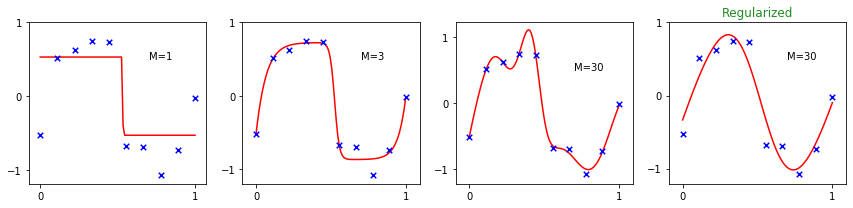

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from nn.feedforward_nn import Feed_Forward

def create_noise_data(Noise_NUM=10):
    x = np.linspace(0, 1, Noise_NUM)[:, None]
    return x, np.sin(2 * np.pi * x) + np.random.normal(scale=0.25, size=(10, 1))

# create training data
train_x,train_y = create_noise_data()

# create test data
test_x = np.linspace(0,1,100)

plt.figure(figsize=(12, 3))
for i,(n_unit,hyper_param) in enumerate(zip([1,3,30,30],[0,0,0,1e-2]),1):
    plt.subplot(1,4,i)
    model = Feed_Forward(1,n_unit,1,alpha = hyper_param)
    model.optimizer(method='scg')
    model.fit(train_x,train_y,n_iter=1000)
    test_y = model(test_x)
    plt.plot(test_x,test_y,color="r",zorder=1)
    plt.scatter(train_x.ravel(), train_y.ravel(), marker="x", color="b",zorder=2,s=30)
    plt.annotate("M={}".format(n_unit), (0.7, 0.5),fontsize=10)
    plt.xticks([0,1])
    plt.yticks([-1,0,1])
    if not(np.allclose(0,hyper_param)):
    	plt.title('Regularized',color='forestgreen')
    plt.subplots_adjust(wspace=1.5)
plt.tight_layout()
plt.show()

## 5.5.6 Convolutional networks

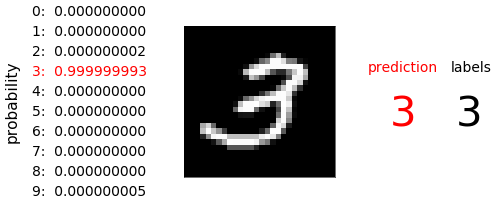

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from deepL_module.datasets.mnist import load_mnist
from deepL_module.nn.sequential import Sequential
from deepL_module.nn.optimizers import *
from deepL_module.base import *
from deepL_module.nn.layers import *



max_epochs = 50


'''#0 loading data '''
(X_train, train_t), (X_test, test_t) = load_mnist(normalize=True, flatten=False)
X_train, train_t = X_train[:10000], train_t[:10000]
train_t = to_categorical(train_t)


'''#1 Counvolutional NN (config)'''
model = Sequential()
model.add(Conv2D(16,(5,5),input_shape=(1,28,28)))
model.add(Activation('relu'))
model.add(Maxpooling(pool_h=2, pool_w=2, stride=2))
model.add(Conv2D(16,(3,3)))
model.add(Activation('relu'))
model.add(Maxpooling(pool_h=2, pool_w=2, stride=2))
model.add(Dense(100, activation='relu'))
model.add(Dense(10))

# optimizer setting
routine = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=routine)


'''#2 learning '''
hist = model.fit(X_train, train_t,
                 batch_size=256,
                 epochs=max_epochs,
                 history=True)

model.save(name='simple_CNN')

# path_r = './../prml/deepL_module/datasets/model_data/simple_CNN.pkl'
# model = load_model(path_r)


'''#3 preparing test data '''
test_size = X_test.shape[0]
fetch_idx = np.random.choice(test_size, 1)
data = X_test[fetch_idx]
label = test_t[fetch_idx]


''' #4 showing image '''
fig = plt.figure(figsize=(11,4),dpi=50)
ax = fig.add_subplot(111)
ax.imshow(data.reshape(28,28),cmap='gray')
plt.tick_params(labelbottom=False,
                labelleft=False,
                bottom=False,
                left=False)


'''#5 output prediction data '''
prob = model.predict(data)
prediction = np.argmax(prob)


# --- probability ---
fig.text(0.05,0.5,"probability",rotation=90, size=22, verticalalignment='center')
c_list = ['k'] * 10
c_list[prediction] = 'r'
for n,p in enumerate(prob.ravel()):
    text = '{}:  {:.9f}'.format(n, p)
    fig.text(0.1, 0.93-0.1*n, text, color=c_list[n], size=20)

    
# --- prediction ---
pos = ax.get_position()
pos_y = 0.5 * (pos.y1 - pos.y0)
fig.text(0.75, pos_y, str(prediction), fontsize=60, color='r')
fig.text(0.71,0.65, "prediction",
        fontsize=20,
        transform=fig.transFigure,
        color='r')


# --- labels ---
fig.text(0.87, pos_y, str(label[0]), fontsize=60, color='k')
fig.text(0.86,0.65, "labels",
        fontsize=20,
        transform=fig.transFigure)
plt.show()

## Supplement
### Other optimization methods

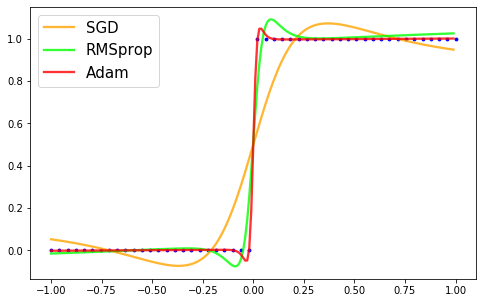

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from deepL_module.nn.multi_layer_nn import *
from deepL_module.nn.optimizers import *
from deepL_module.nn.layers import *

N = 50 # The number of test data

def heaviside(x):
    return 0.5 * (np.sign(x) + 1)


# training data
train_x = np.linspace(-1, 1, N).reshape(N, 1)
train_y = heaviside(train_x)

# Construncting NeuralNet
model = Neural_net(1,3,1)
model.add(['tanh'])

# test data
x = np.arange(-1,1,0.01).reshape(-1,1)

# Plotting training data
color_list = ['blue','orange','lime','red']
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.scatter(train_x, train_y,s=8,color=color_list[0],zorder=2)

# Plotting output data
lr_list = [0.02, 0.01, 0.1]
for n,(routine, _lr) in enumerate(zip(['SGD','RMSprop','Adam'],lr_list),1):
    optim = eval(routine + '(lr=_lr)')
    model.compile(optimizer=optim, loss='sum_squared_error')
    model.fit(train_x,train_y,n_iter=1500)
    y = model(x)
    ax.plot(x.ravel(), y.ravel(), color_list[n], zorder=3, label=routine, linewidth=2.3, alpha=0.8)
plt.legend(fontsize=15)
plt.show()

### See also Jupyter notebook files [Deep learning test](https://nbviewer.jupyter.org/github/oilneck/prml_python/blob/master/Notebook/test_Deep_learning.ipynb) / [Sequential models](https://nbviewer.jupyter.org/github/oilneck/prml_python/blob/master/Notebook/simple_CNN_model.ipynb) for more details about deep learning.